# На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

## Задания 


1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

3. На каких платформах произошло больше всего релизов?

4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?

5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

## Описание данных


- Rank – место по объему продаж
- Name – название игры
- Platform – платформа, на которой выпущена игра
- Year – год релиза
- Genre – жанр
- Publisher – издатель
- NA_Sales – продажи в Северной Америке, в млн.
- EU_Sales – продажи в Европе, в млн.
- JP_Sales – продажи в Японии, в млн.
- Other_Sales – продажи в остальном мире, в млн.
- Global_Sales – продажи по всему миру, в млн.

In [1]:
# импортируем библиотеки
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

## 1

Загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [8]:
# считываем данные 
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/Mini projects statistics module/games.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
# пропущенные значения 
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
# удаляем пропущенные значения 
df = df.dropna()

In [12]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

____

## 2

Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

In [23]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [22]:
# изменим тип данных в стольбце год с float на int
df.Year = df.Year.astype('int')

In [24]:
df.Year.dtype

dtype('int64')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


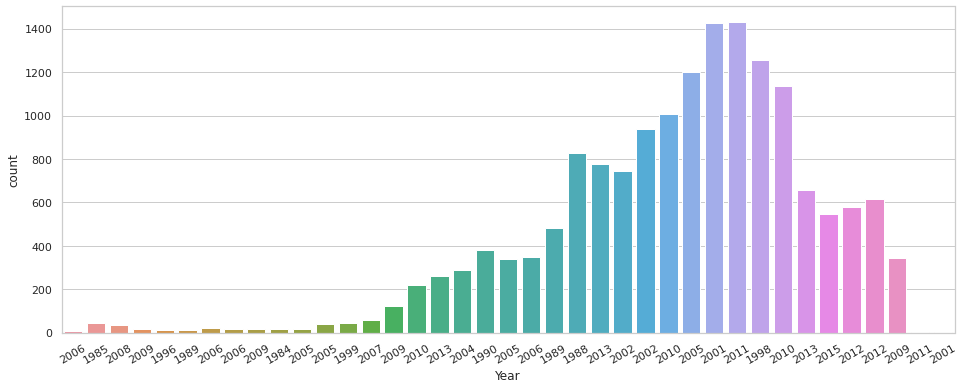

In [19]:
# строим график 
ax,fig = plt.subplots()
fig = sns.countplot(df.Year)
fig.set_xticklabels(labels = df.Year, rotation=30);

_____

## 3

На каких платформах произошло больше всего релизов?
Оставьте названия тех платформ, частота втречаемости которых составляет более 7%. 
Значения уакажите в порядке убывания через запятую.

In [28]:
platforms = df['Platform'].value_counts(normalize=True)\
                          .to_frame()\
                          .reset_index()\
                          .query('Platform>0.07')['index']\
                          .to_list()
platforms

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

____

## 4

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [34]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Hello Games                        1
CCP                                1
Yumedia                            1
Kando Games                        1
Game Arts                          1
Name: Publisher, Length: 576, dtype: int64

In [32]:
df.Publisher.mode()

0    Electronic Arts
dtype: object

Чаще всего встречаются игры от Electronic Arts.

____

## 5
В каком регионе медианное значение объема продаж игр Nintendo является наибольшим?

In [33]:
df.query('Publisher == "Nintendo"')\
  .agg({'NA_Sales':['median'],
        'EU_Sales':['median'],
        'JP_Sales':['median'],
        'Other_Sales':['median']})

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
median,0.375,0.12,0.28,0.03


Наибольшее медианное значение продаж игр Nintendo в Северной Америке 

## 6
Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

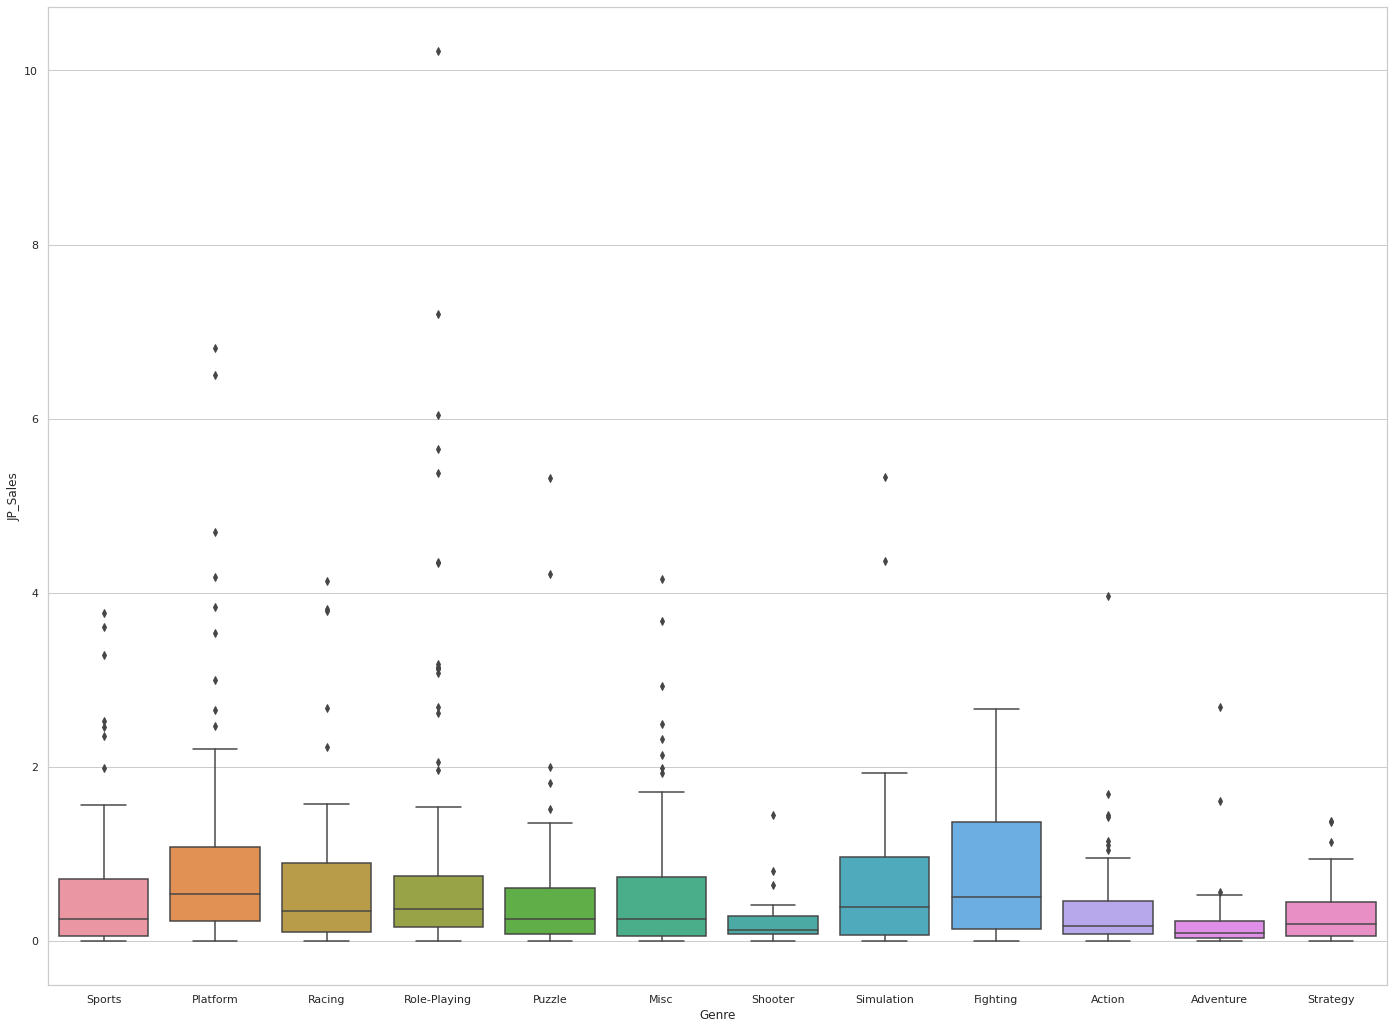

In [38]:
plt.figure(figsize=(24,18))
sns.boxplot(data = df.query('Publisher == "Nintendo"'), 
            x = 'Genre', 
            y = 'JP_Sales');

Наибольшее медианное значение продаж в Японии у жанров Fighting и Platform 

___

## 7

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [45]:
# создадим список жанров
genre = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']

In [47]:
df2 = df.query('Genre in @genre & Publisher=="Nintendo"')\
        .groupby(['Genre','Year'], as_index=False)\
        .agg({'Global_Sales':'sum'})
df2

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


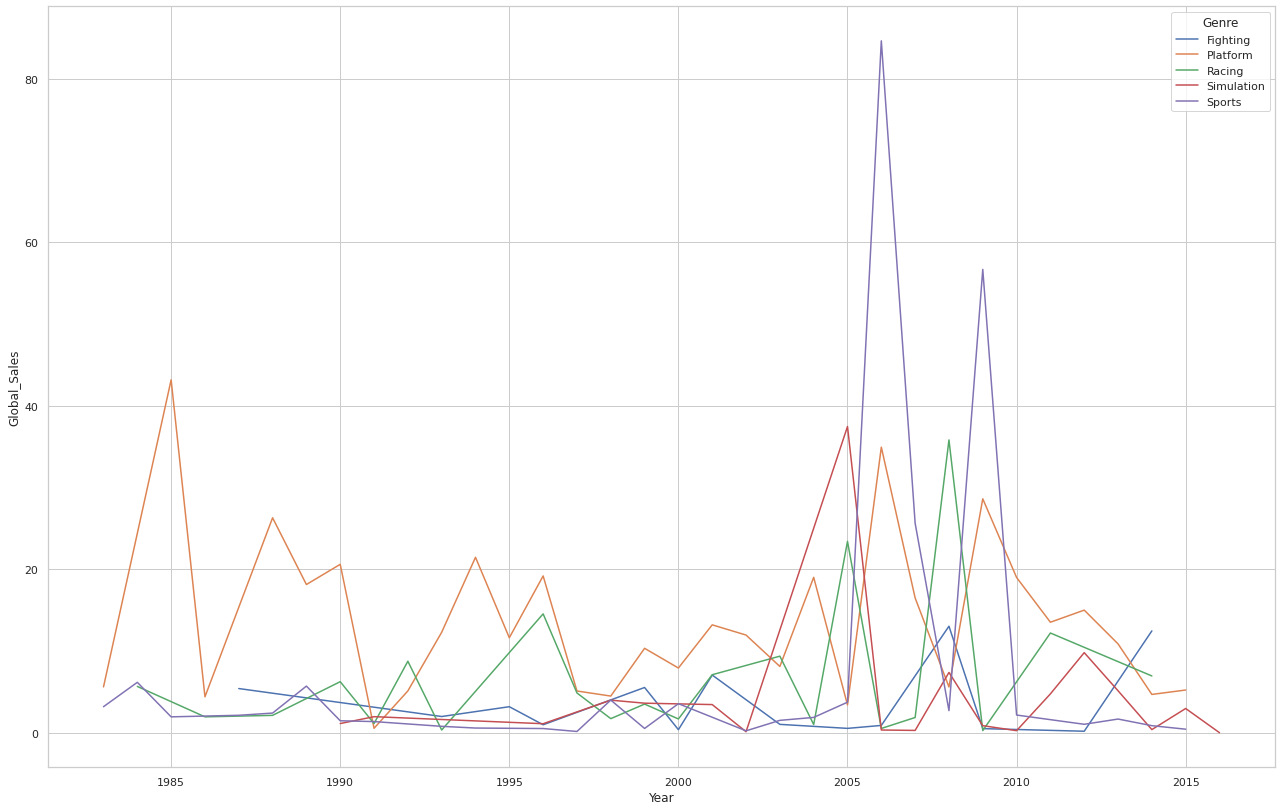

In [53]:
plt.figure(figsize=(22,14))
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = df2)

Для жанра Sports самыми удачным был период с 2005 по 2010 года.